In [1]:
#Regression problem

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = pd.read_csv(r'C:\Users\hp\Downloads\agricultural_yield.csv')

In [5]:
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [6]:
X=data[['Soil_Quality',	'Seed_Variety',	'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm',	'Irrigation_Schedule']]	
y=data['Yield_kg_per_hectare']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#model building
model = Sequential([
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [25]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 497564.0625 - mae: 678.9802 - val_loss: 455468.5000 - val_mae: 651.2228
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 388040.3438 - mae: 599.4484 - val_loss: 275060.6875 - val_mae: 507.3272
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217082.6406 - mae: 448.6239 - val_loss: 90559.4062 - val_mae: 287.9534
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64357.7969 - mae: 235.3099 - val_loss: 19203.6992 - val_mae: 116.9140
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16593.2949 - mae: 106.5999 - val_loss: 11185.8604 - val_mae: 84.7027
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11200.3584 - mae: 85.8129 - val_loss: 9809.8604 - val_mae: 79.1758
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9615.8809 - mae: 78.0039 - val_loss: 9112.1523 - val_mae: 76.0583
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9093.4033 - mae: 75.4370 - val_loss: 8535

In [31]:
test_loss,test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolue Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2566.0056 - mae: 41.1238 
Test Mean Absolue Error: 39.40


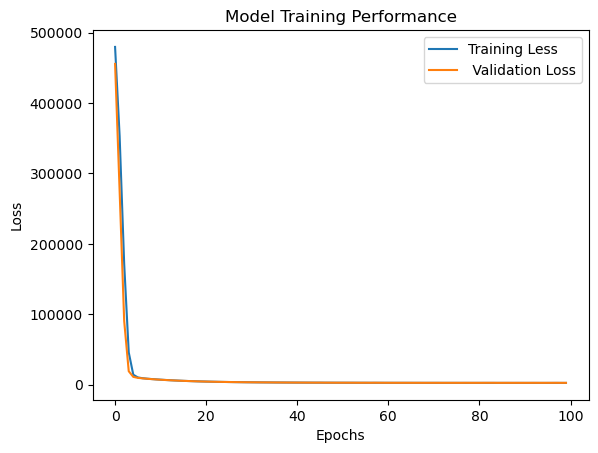

In [33]:
plt.plot(history.history ['loss'], label='Training Less')
plt.plot(history.history['val_loss'], label=' Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3840\54570079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')


NameError: name 'y_pred' is not defined

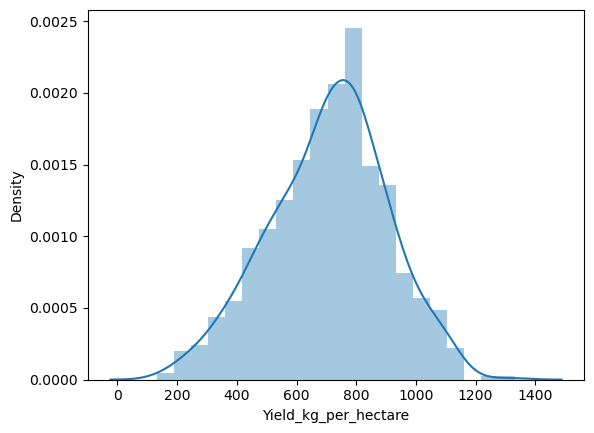

In [37]:
# Distribution plots
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [47]:
Y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [49]:
predictions=model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 440.24597],
       [ 670.8234 ],
       [1072.7764 ],
       [ 664.47723],
       [ 813.71313],
       [ 993.7266 ],
       [ 302.7853 ],
       [ 590.9028 ],
       [ 448.36282],
       [ 803.16095],
       [ 602.80396],
       [ 681.9987 ],
       [ 632.1514 ],
       [ 748.85236],
       [ 851.5494 ],
       [ 681.1172 ],
       [ 961.4841 ],
       [ 477.02158],
       [ 589.37573],
       [ 362.7814 ],
       [ 798.8354 ],
       [ 810.0801 ],
       [ 369.1853 ],
       [ 826.0904 ],
       [1007.2989 ],
       [ 593.457  ],
       [ 656.894  ],
       [ 964.80005],
       [ 628.7202 ],
       [ 625.2336 ],
       [ 688.0877 ],
       [ 810.1171 ],
       [ 839.0174 ],
       [ 791.09845],
       [ 500.83365],
       [ 720.1058 ],
       [ 718.98773],
       [1016.7465 ],
       [ 217.49986],
       [ 655.75433],
       [ 932.6435 ],
       [ 895.3306 ],
       [ 786.59406],
       [ 764.4761 ],
       [ 613.53235],
       [ 840.7256 ],
       [ 614.97546],
       [ 578.

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

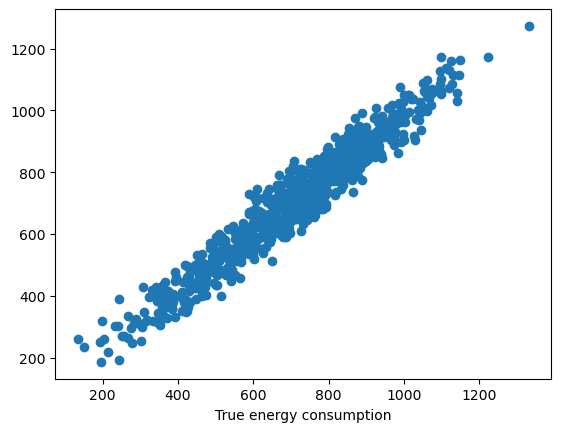

In [53]:
plt.scatter(y_test,predictions)
plt.xlabel('True energy consumption')
plt.ylable('Prediction energy consumption')
plt.show()